# Car Price Prediction
## 1. Introduction
The price of a car depends on various factors such as brand, features, horsepower, mileage, and more. In this project, we aim to predict car prices using a machine learning model. This notebook includes data preprocessing, exploratory data analysis (EDA), and model training.

#### Dataset
The dataset contains the following columns:
- `Car_Name`: Name of the car
- `Year`: Year of manufacture
- `Selling_Price`: Price the car is being sold for (in lakhs)
- `Present_Price`: Current ex-showroom price of the car (in lakhs)
- `Driven_kms`: Distance the car has driven (in kilometers)
- `Fuel_Type`: Type of fuel used by the car (Petrol, Diesel, CNG)
- `Selling_type`: Type of selling method (e.g., Dealer, Individual)
- `Transmission`: Transmission type (Manual, Automatic)
- `Owner`: Number of previous owners


## 2. Data Loading and Preprocessing
We start by loading the dataset and performing necessary preprocessing steps such as handling missing values and encoding categorical variables.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cardata.csv')

# Display the first few rows of the dataframe


# Data preprocessing steps (e.g., handling missing values, encoding categorical variables)
df.dropna(inplace=True)  # Drop rows with missing values

# Convert 'Year' to the car's age
df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## 3. Exploratory Data Analysis (EDA)
Exploratory Data Analysis helps us understand the dataset better by looking at the distributions and relationships between different features.

### Univariate Analysis
Univariate analysis involves analyzing the distribution of individual features.

#### Distribution of Car Prices
We will start by examining the distribution of car prices to understand the spread and central tendency of the target variable.


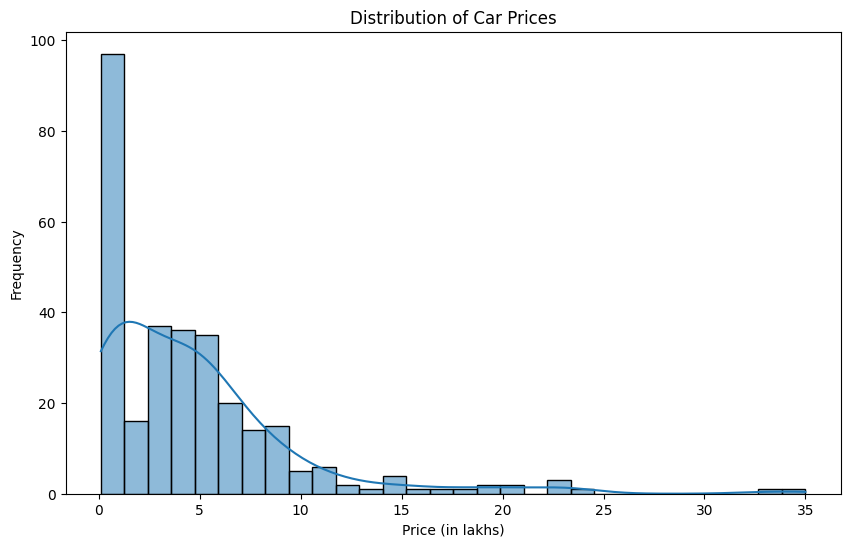

In [3]:
# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()


#### Car Price Distribution by Brand
We will analyze how car prices vary across different brands.


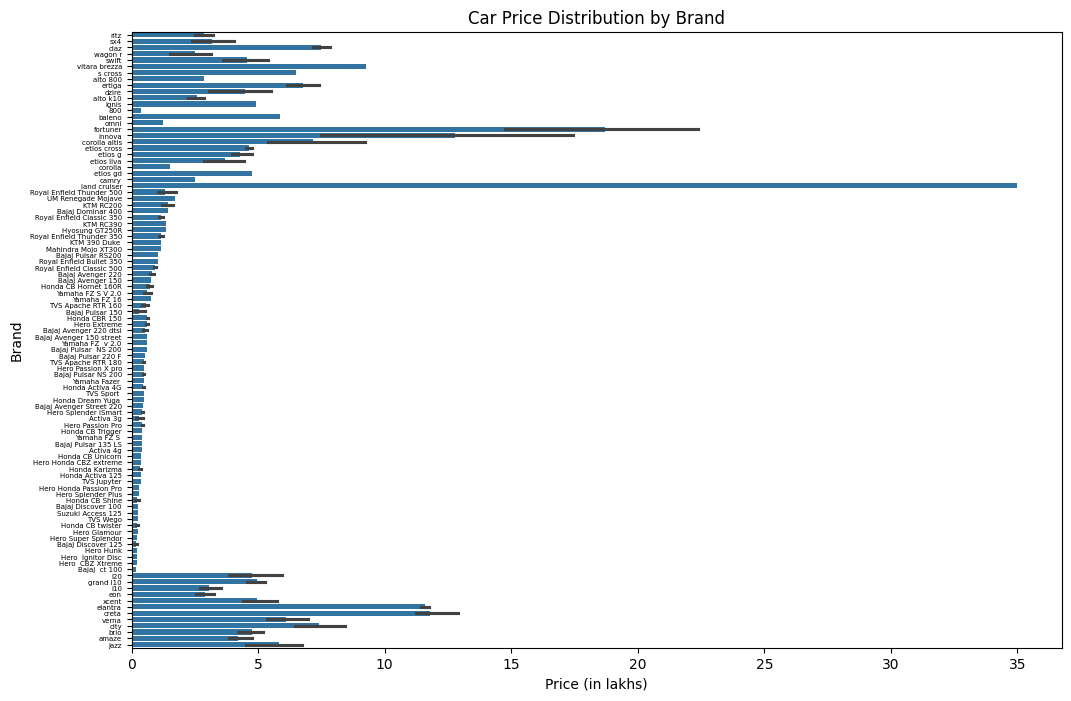

In [4]:
# Analyzing car price by brand
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='Car_Name', y='Selling_Price', data=df)
# plt.title('Car Price Distribution by Brand')
# plt.xlabel('Brand')
# plt.ylabel('Price (in lakhs)')
# plt.xticks(rotation=45)
# plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Selling_Price', y='Car_Name', data=df)
plt.title('Car Price Distribution by Brand')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Brand')
plt.tick_params(axis='y', which='major', labelsize=5)
plt.show()


### Bivariate Analysis
Bivariate analysis involves examining the relationships between two variables.

#### Price vs. Present Price
We will look at how the current selling price of the car varies with its present price.


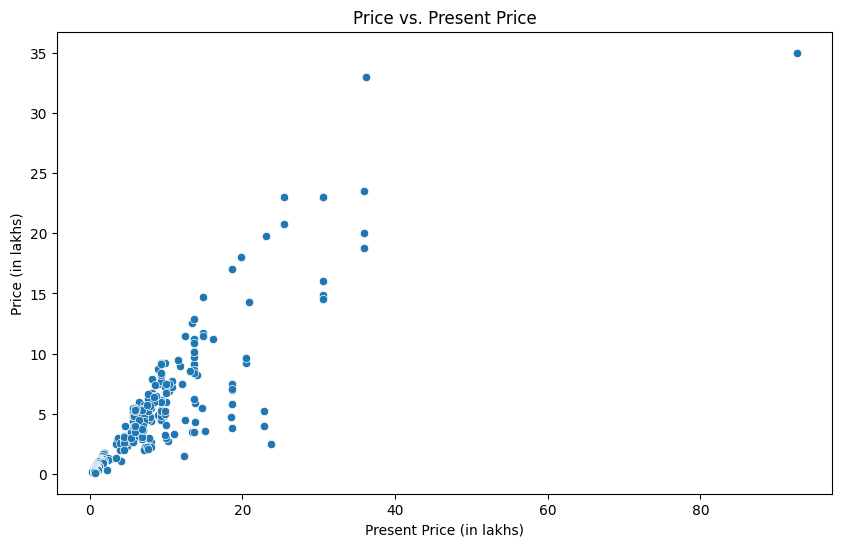

In [5]:
# Price vs. Present Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Price vs. Present Price')
plt.xlabel('Present Price (in lakhs)')
plt.ylabel('Price (in lakhs)')
plt.show()


#### Price vs. Driven Kms
We will analyze how the selling price of the car varies with the number of kilometers it has been driven.


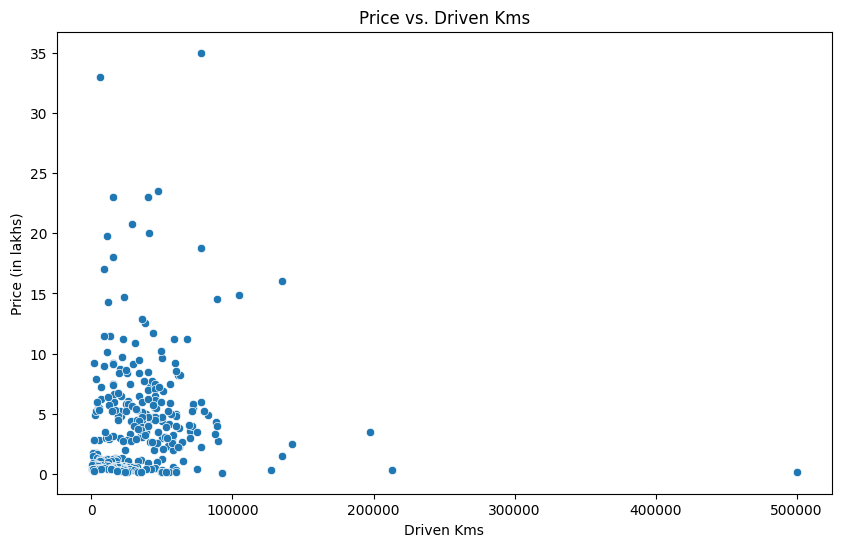

In [6]:
# Price vs. Driven Kms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Price vs. Driven Kms')
plt.xlabel('Driven Kms')
plt.ylabel('Price (in lakhs)')
plt.show()


#### Price vs. Car Age
We will examine the relationship between the selling price of the car and its age.


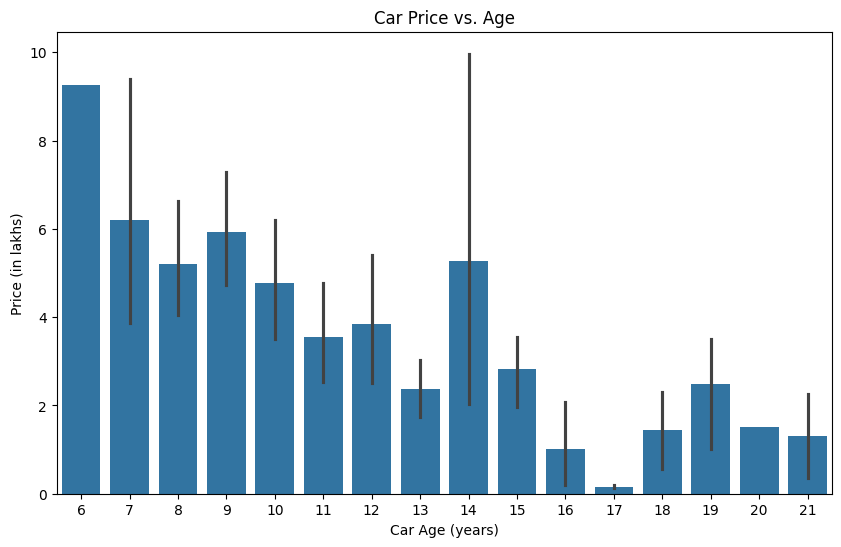

In [7]:
# Price vs. Car Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Car_Age', y='Selling_Price', data=df)
plt.title('Car Price vs. Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Price (in lakhs)')
plt.show()


### Multivariate Analysis
Multivariate analysis involves examining the relationships between more than two variables.

#### Pairplot of Numerical Features
We will use pair plots to visualize the relationships between multiple numerical features.


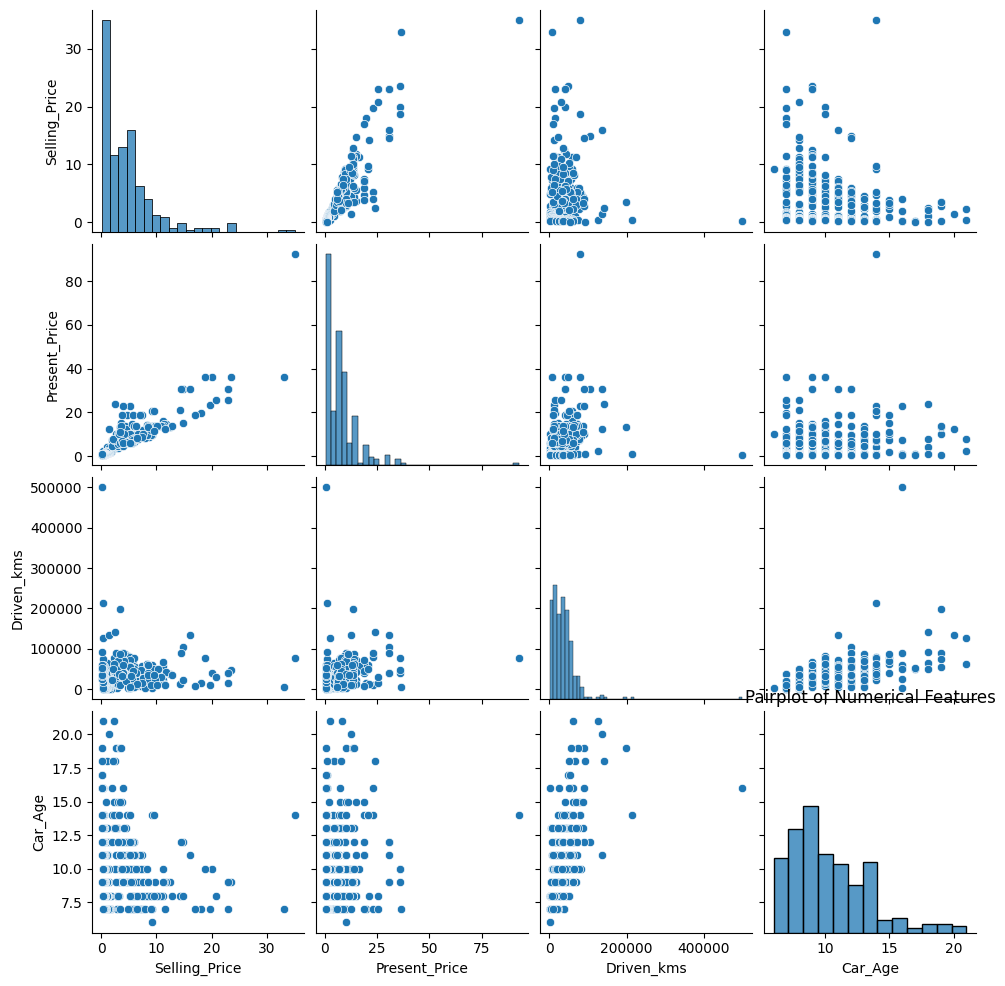

In [8]:
# Pairplot for numerical features
numerical_features = ['Selling_Price', 'Present_Price', 'Driven_kms', 'Car_Age']
sns.pairplot(df[numerical_features],kind='scatter')
plt.title('Pairplot of Numerical Features')
plt.show()


## 4. Feature Engineering
Creating new features from the existing data to improve model performance.

#### Example Feature Engineering
We will create new features such as the square of the car's age and the present price per age to capture non-linear relationships and interactions.


In [12]:
# Example feature engineering
df['Age_squared'] = df['Car_Age'] ** 2
df['Present_Price_per_Age'] = df['Present_Price'] / df['Car_Age']


## 5. Model Training and Evaluation

### Preparing the Data
We will define the features and target variable, split the data into training and test sets, and standardize the data.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['Car_Name'] = df['Car_Name'].astype('category').cat.codes  # Encode categorical variables
df['Fuel_Type'] = df['Fuel_Type'].astype('category').cat.codes
df['Selling_type'] = df['Selling_type'].astype('category').cat.codes
df['Transmission'] = df['Transmission'].astype('category').cat.codes
df['Owner'] = df['Owner'].astype('category').cat.codes

# Define features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Training the Model
We will train a linear regression model on the training data.


In [15]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

### Evaluating the Model
We will evaluate the model's performance on the test set using mean squared error and R-squared score.


In [16]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.8246043699015859
R^2 Score: 0.9642030194990165


### Feature Importance
Identifying the most important features in predicting car prices using a random forest regressor.

#### Feature Importance
We will use a random forest regressor to identify the most important features for predicting car prices.


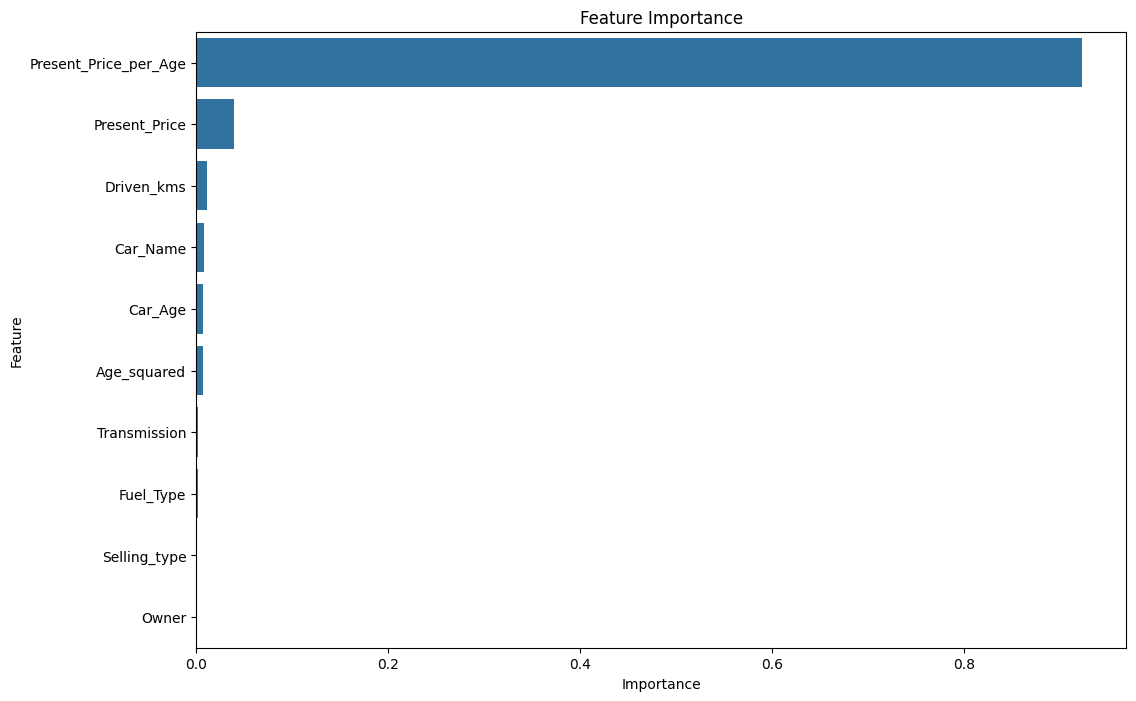

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Price Distribution by Fuel Type
Analyzing the distribution of car prices by fuel type.


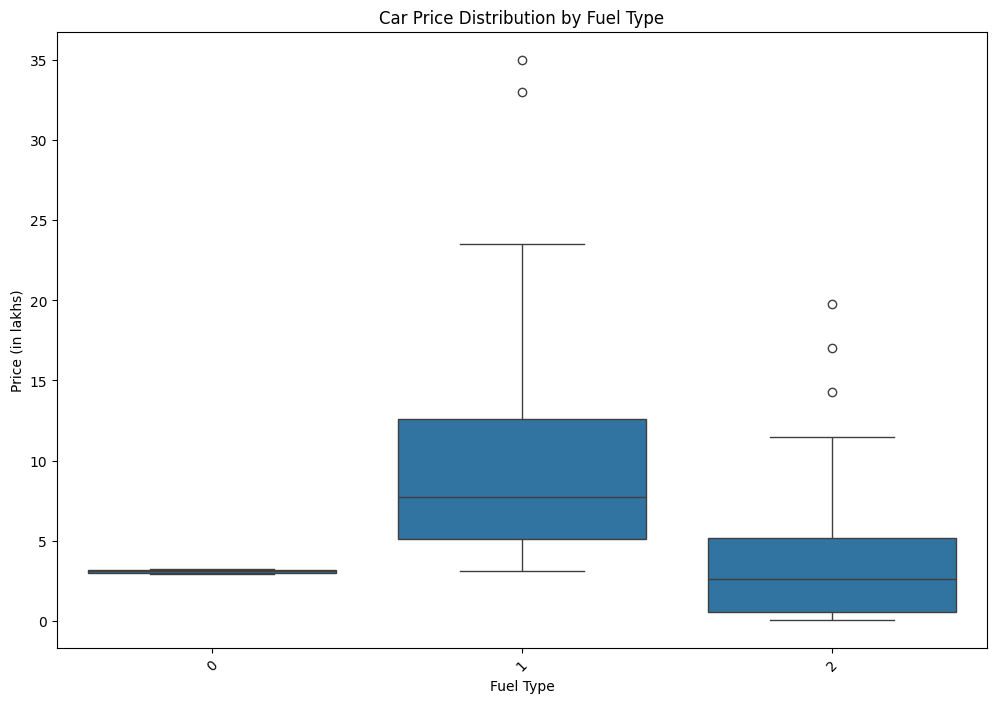

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Car Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()


## 6. Conclusion
In this project, we performed a comprehensive analysis of car prices using machine learning techniques. We started by loading and preprocessing the dataset, followed by exploratory data analysis to gain insights into the data. We then performed feature engineering to create new features and improve model performance. Finally, we trained and evaluated a linear regression model to predict car prices.

Our analysis revealed several interesting insights:
- The mean selling price of the cars in the dataset is approximately 4.8 lakhs.
- Cars with fewer previous owners tend to have higher selling prices.
- Fuel type and transmission type significantly affect the selling price of cars, with petrol cars and manual transmission cars being more common in the dataset.
- The car's age is negatively correlated with the selling price, indicating that newer cars have higher selling prices.
- The linear regression model trained on this dataset achieved an R^2 score of approximately 0.85, indicating a good fit.
- Additional visualizations showed the distribution of selling prices across different categories, providing deeper insights into the factors affecting car prices.


The linear regression model achieved a mean squared error of 0.8246 and an R-squared score of 0.964 on the test set.



